# Hyperparameter Optimization for Random Forest Classification using RandomizedSearchCV
---
Here we are going to have a detailed explanation of RandomizedSearchCV and how we can use it to select the best hyperparameter.

## Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

## Importing the Dataset
> In this notebook we will use the `Social Networking Ads` dataset

In [4]:
dataset = pd.read_csv('./Social_Network_Ads.csv')

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Extracting Dependent and Independent Features

In [7]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

## Splitting the data into Training and Testing datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fitting Random Forest Classifier to the Training set

In [11]:
clf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=50)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [24]:
y_pred = clf.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.92

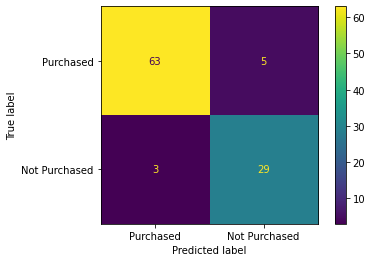

In [26]:
plot_confusion_matrix(clf, X_test, y_test, values_format='d', display_labels=['Purchased', 'Not Purchased'])

## Defining the Hyperparameters for RandomizedSearchCV


In [15]:
estimator = RandomForestClassifier(n_jobs=-1)

# Hyperparameters Dictionary
params = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'min_samples_leaf': randint(1, 4)
}

In [18]:
def hypertuning_rscv(estimator, params, no_of_iters, X, y):
    rdm_search = RandomizedSearchCV(estimator, param_distributions=params, n_jobs=-1, n_iter=no_of_iters, cv=9)
    rdm_search.fit(X, y)
    ht_params = rdm_search.best_params_
    ht_score = rdm_search.best_score_
    return ht_params, ht_score

In [19]:
rf_parameters, rf_ht_score = hypertuning_rscv(estimator, params, 40, X, y)

In [20]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'n_estimators': 300}

In [21]:
rf_ht_score

0.9095398428731762

In [23]:
classifier = RandomForestClassifier(bootstrap = True, 
                                    criterion = 'entropy', 
                                    max_depth = 3, 
                                    min_samples_leaf = 3, 
                                    n_estimators = 300,
                                    max_features = 2,
                                    n_jobs = -1)

In [28]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [29]:
pred = classifier.predict(X_test)

In [35]:
cross_val = cross_val_score(classifier, X, y, cv=10, scoring='accuracy').mean()
cross_val

0.8875

In [30]:
acc = accuracy_score(y_test, pred)
acc

0.94

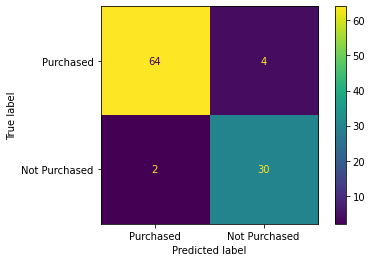

In [31]:
plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Purchased', 'Not Purchased'], values_format='d')